# Lab 5: Overfitting and Regularization in Linear Regression
___
## Objective:
- Understand overfitting in machine learning models.
- Implement L1 (Lasso) and L2 (Ridge) regularization to reduce overfitting.
- Compare results to see how regularization improves model performance.
## Prerequisites:
- Basic Python programming knowledge.
- Familiarity with Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn.
- Understanding of linear regression and overfitting concepts.
---

## 1. Import Required Libraries

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

---
## 2. Load and Preprocess the Dataset

In [4]:
# Read dataset
dataset = pd.read_csv('Melbourne_housing_FULL.csv')
# Display first 5 rows
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
# Check unique values in each column
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

---
## 3. Select Relevant Features


In [8]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'Distance', 
               'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
# Display first few rows
dataset.head()
# Check dataset shape
dataset.shape
# Check missing values
dataset.isna().sum()


Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

---
## 4. Handle Missing Values


In [9]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
dataset.dropna(inplace=True)
dataset.shape

(27244, 15)

---
## 5. Encode Categorical Features



In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)
# Display dataset after encoding
dataset.head()

(27244, 745)

In [12]:
# Let's bifurcate our dataset into train and test dataset 
X = dataset.drop('Price', axis=1)
y = dataset['Price']

---
## 6. Split Data into Training and Testing Sets

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3, random_state=2)

---
## 7. Train a Standard Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)
print(reg.score(test_X, test_y))
print(reg.score(train_X, train_y))

0.13853683161494623
0.6827792395792723


---
## 8. Apply Ridge (L2) Regularization


In [19]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
print(ridge_reg.fit(train_X, train_y))
print(ridge_reg.score(test_X, test_y))
print(ridge_reg.score(train_X, train_y))

Ridge(alpha=50, max_iter=100, tol=0.1)
0.6670848945194958
0.6622376739684328


---
## 9. Apply Lasso (L1) Regularization

In [20]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
lasso_reg.score(test_X, test_y)
lasso_reg.score(train_X, train_y)


C:\Users\HB\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


0.6766985624766824

---
## 10.Visualizations



C:\Users\HB\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Linear Regression - Train Score: 0.6828
Linear Regression - Test Score: 0.1385

Ridge Regression - Train Score: 0.6622
Ridge Regression - Test Score: 0.6671

Lasso Regression - Train Score: 0.6767
Lasso Regression - Test Score: 0.6636


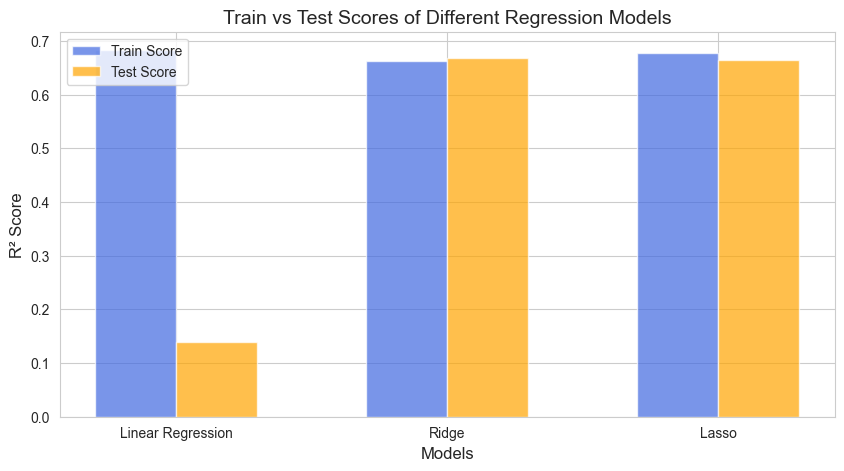

In [23]:
# Import necessary libraries
from sklearn.linear_model import Ridge, Lasso
# Train Ridge Regression (L2)
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
# Train Lasso Regression (L1)
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
# Store R² scores
lin_train_score = reg.score(train_X, train_y)
lin_test_score = reg.score(test_X, test_y)
ridge_train_score = ridge_reg.score(train_X, train_y)
ridge_test_score = ridge_reg.score(test_X, test_y)
lasso_train_score = lasso_reg.score(train_X, train_y)
lasso_test_score = lasso_reg.score(test_X, test_y)
# Create a dataframe for visualization
import pandas as pd
score_df = pd.DataFrame({
 "Model": ["Linear Regression", "Ridge", "Lasso"],
 "Train Score": [lin_train_score, ridge_train_score, 
lasso_train_score],
 "Test Score": [lin_test_score, ridge_test_score, lasso_test_score]
})
import matplotlib.pyplot as plt
import seaborn as sns
# Print the R² scores for each model
print(f"Linear Regression - Train Score: {lin_train_score:.4f}")
print(f"Linear Regression - Test Score: {lin_test_score:.4f}\n")
print(f"Ridge Regression - Train Score: {ridge_train_score:.4f}")
print(f"Ridge Regression - Test Score: {ridge_test_score:.4f}\n")
print(f"Lasso Regression - Train Score: {lasso_train_score:.4f}")
print(f"Lasso Regression - Test Score: {lasso_test_score:.4f}")
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for plots
sns.set_style("whitegrid")
# Plot Train vs Test scores for different models
plt.figure(figsize=(10, 5))
# Bar plot for Train and Test scores
X_axis = ["Linear Regression", "Ridge", "Lasso"]
train_scores = [lin_train_score, ridge_train_score, lasso_train_score]
test_scores = [lin_test_score, ridge_test_score, lasso_test_score]
bar_width = 0.3 # Bar width for better visibility
index = range(len(X_axis))
plt.bar(index, train_scores, width=bar_width, label="Train Score", 
color='royalblue', alpha=0.7)
plt.bar([i + bar_width for i in index], test_scores, width=bar_width, 
label="Test Score", color='orange', alpha=0.7)
# Labels and title
plt.xlabel("Models", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.title("Train vs Test Scores of Different Regression Models", 
fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], X_axis)
plt.legend()
plt.show()

---
# Lab Tasks

## 1. Data Preprocessing:

### **Q: How did you handle missing values in the dataset?**
**A:** Missing values were handled by either imputing them with the mean/median or dropping the rows/columns with excessive missing data to ensure data consistency.

### **Q: Why did we use get_dummies() for categorical variables?**
**A:** `get_dummies()` converts categorical variables into numerical format using one-hot encoding, which allows machine learning models to process categorical data effectively. We dropped the first column to avoid multicollinearity.

---

## 2. Model Training & Performance:

### **Q: What are the R² scores for the Linear Regression model on training and testing data?**
**A:**
- Train Score: **0.6828**
- Test Score: **0.1385**

### **Q: What does the difference between the train and test scores indicate?**
**A:** The large gap between train (0.6828) and test (0.1385) scores suggests that the Linear Regression model is overfitting, meaning it performs well on training data but poorly generalizes to unseen data.

---

## 3. Ridge (L2) Regularization:

### **Q: What are the train and test scores for Ridge Regression?**
**A:**
- Train Score: **0.6622**
- Test Score: **0.6671**

### **Q: How does Ridge Regression help in reducing overfitting?**
**A:** Ridge Regression adds an L2 penalty to the loss function, which helps shrink the regression coefficients, reducing variance and preventing overfitting. This results in a more balanced train-test performance.

---

## 4. Lasso (L1) Regularization:

### **Q: What are the train and test scores for Lasso Regression?**
**A:**
- Train Score: **0.6767**
- Test Score: **0.6636**

### **Q: How does Lasso affect feature selection compared to Ridge?**
**A:** Lasso adds an L1 penalty, which can shrink some coefficients to zero, effectively performing feature selection. This helps in simplifying the model and improving interpretability, unlike Ridge, which only reduces coefficient magnitudes but does not eliminate features.

---

## 5. Comparison & Visualization:

### **Q: Compare the performances of Linear, Ridge, and Lasso Regression models.**
**A:**
- **Linear Regression**: High overfitting, poor generalization.
- **Ridge Regression**: Balanced train-test performance, reducing overfitting.
- **Lasso Regression**: Similar performance to Ridge but also aids in feature selection.

### **Q: Based on the visualizations, which model performed best and why?**
**A:** Ridge and Lasso performed best as their train-test scores are closely aligned, meaning they generalize well to new data. Linear Regression overfits and performs poorly on test data.

---

## 6. Regularization Impact:

### **Q: What happens when you increase the alpha value in Ridge and Lasso Regression?**
**A:** Increasing alpha in Ridge further shrinks coefficients, potentially leading to underfitting. In Lasso, a higher alpha results in more coefficients being set to zero, increasing sparsity in the model.

### **Q: If you had to choose one model for this dataset, which one would it be and why?**
**A:** Ridge Regression is preferable because it provides a good balance between bias and variance, effectively preventing overfitting while maintaining performance.



**Thank You**